# Data Cleaning

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn import datasets, ensemble
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
iris = pd.read_csv('./iris-data.csv')
iris

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             2.3   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 5 columns]

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

array([[<AxesSubplot:title={'center':'sepal_length_cm'}>,
        <AxesSubplot:title={'center':'sepal_width_cm'}>],
       [<AxesSubplot:title={'center':'petal_length_cm'}>,
        <AxesSubplot:title={'center':'petal_width_cm'}>]], dtype=object)

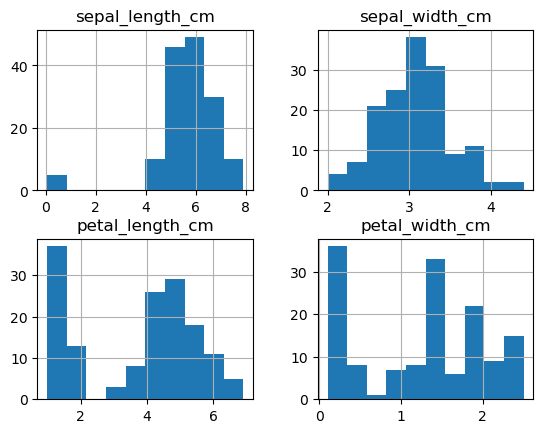

In [5]:
iris.hist()

[Text(0.5, 0, 'petal_length_(cm)'),
 Text(0, 0.5, 'petal_width_(cm)'),
 Text(0.5, 1.0, 'Petal')]

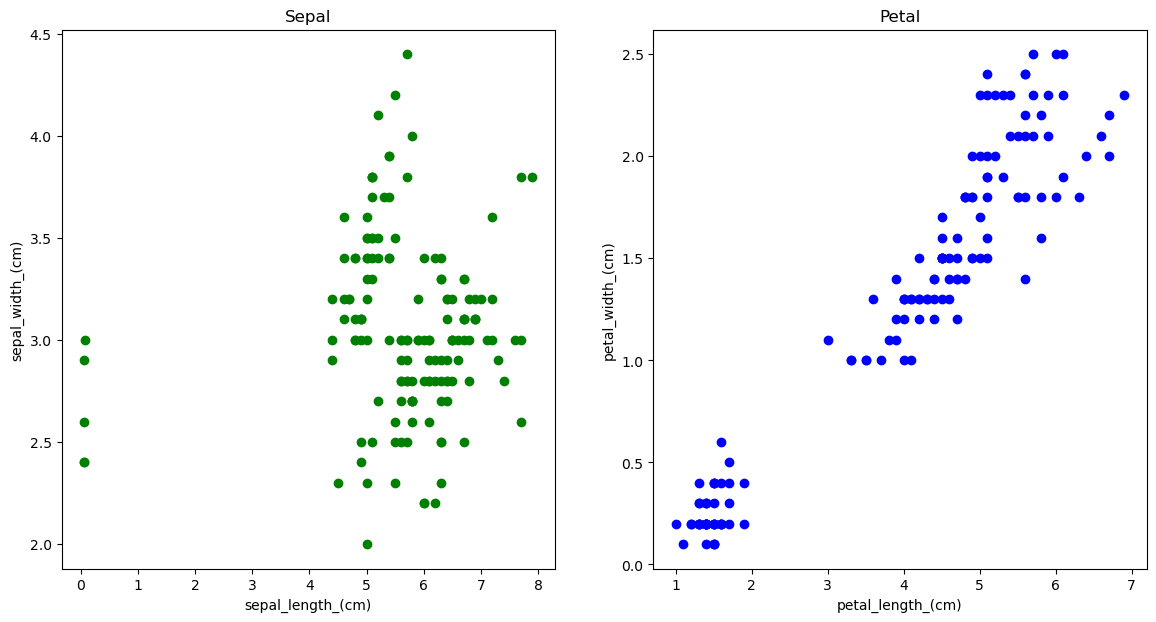

In [6]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,7))
axs[0].scatter(iris['sepal_length_cm'], iris['sepal_width_cm'], c='green')
axs[0].set(xlabel='sepal_length_(cm)', ylabel='sepal_width_(cm)', title='Sepal')
axs[1].scatter(iris['petal_length_cm'], iris['petal_width_cm'], c='blue')
axs[1].set(xlabel='petal_length_(cm)', ylabel='petal_width_(cm)', title='Petal')

# Missing Values

In [7]:
# Categorical features
cols = ['class']
cat_list = []
for col in cols:
    cat = iris[col].unique()
    cat_num = len(cat)
    cat_dict = {"categorical_variable": col,"number_of_possible_values":cat_num, "values":cat}
    cat_list.append(cat_dict)
categories=pd.DataFrame(cat_list).sort_values(by='number_of_possible_values')
categories


categorical_variable  number_of_possible_values  \
0                class                          5   

                                              values  
0  [Iris-setosa, Iris-setossa, Iris-versicolor, v...

In [8]:
# Valores faltantes o nulos
iris.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
# Funcion para ver valores faltantes en porcentajes
def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [10]:
# Ejecucion funcion
missing_percentage(iris)

column_name  percent_missing
sepal_length_cm  sepal_length_cm         0.000000
sepal_width_cm    sepal_width_cm         0.000000
petal_length_cm  petal_length_cm         0.000000
petal_width_cm    petal_width_cm         3.333333
class                      class         0.000000

In [11]:
# Delete Missing Values

In [12]:
null_col = ['petal_width_cm']
#null_col
iris_null_col = iris[null_col]
iris_null_col 

petal_width_cm
0               0.2
1               0.2
2               0.2
3               0.2
4               0.2
..              ...
145             2.3
146             2.3
147             2.0
148             2.3
149             1.8

[150 rows x 1 columns]

In [13]:
missing_percentage(iris_null_col )

column_name  percent_missing
petal_width_cm  petal_width_cm         3.333333

In [14]:
iris_drop = iris.dropna()
iris_drop

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             2.3   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[145 rows x 5 columns]

In [15]:
missing_percentage(iris_drop)

column_name  percent_missing
sepal_length_cm  sepal_length_cm              0.0
sepal_width_cm    sepal_width_cm              0.0
petal_length_cm  petal_length_cm              0.0
petal_width_cm    petal_width_cm              0.0
class                      class              0.0

In [16]:
# Ordenacion
iris_o = iris_drop.sort_values(by='class')
iris_o

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0               5.1             3.5              1.4             0.2   
30              4.8             3.1              1.6             0.2   
31              5.4             3.4              1.5             0.4   
32              5.2             4.1              1.5             0.1   
33              5.5             4.2              1.4             0.2   
..              ...             ...              ...             ...   
99              5.7             2.8              4.1             1.3   
98              5.1             2.5              3.0             1.1   
97              6.2             2.9              4.3             1.3   
96              5.7             2.9              4.2             1.3   
95              5.7             3.0              4.2             1.2   

          class  
0   Iris-setosa  
30  Iris-setosa  
31  Iris-setosa  
32  Iris-setosa  
33  Iris-setosa  
..          ...  
99   versicolor  
98   versicolor  
97   versicolor  
96   versicolor  
95   versicolor  

[145 rows x 5 columns]

# Correlation


In [17]:
#Matriz de correlacion
iris_corr = iris_o.corr()
iris_corr 

sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm         1.000000        0.073926         0.480736   
sepal_width_cm          0.073926        1.000000        -0.411939   
petal_length_cm         0.480736       -0.411939         1.000000   
petal_width_cm          0.469734       -0.348464         0.958934   

                 petal_width_cm  
sepal_length_cm        0.469734  
sepal_width_cm        -0.348464  
petal_length_cm        0.958934  
petal_width_cm         1.000000

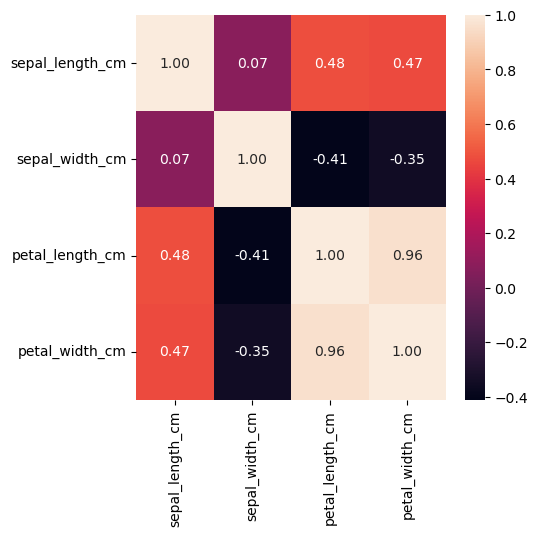

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(iris_o.corr(method='pearson'), annot=True, fmt='.2f', ax=ax);

In [19]:
# Save
iris_o.to_csv('./iris_new.csv') 